<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/DZ_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rezult = pd.read_csv('water.csv')
#rezult
rezult_ru = rezult.rename(columns={'Unnamed: 0': 'Номер', 'location': 'Район', 
                                   'town': 'Город', 'mortality': 'Смертность'
                                   , 'hardness': 'Жесткость воды'
                                   })
rezult_anl = rezult_ru [['Смертность', 'Жесткость воды']]
#rezult_anl

In [3]:
rezult_ru.head(3)

,Номер,Район,Город,Смертность,Жесткость воды
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5


In [4]:
rezult_ru_s = rezult_ru[rezult_ru['Район'] == 'South']
#rezult_ru_s
rezult_ru_n = rezult_ru[rezult_ru['Район'] == 'North']
#rezult_ru_n

In [ ]:
#rezult.info()

# **1. Раздел**

# 1.Точечный график

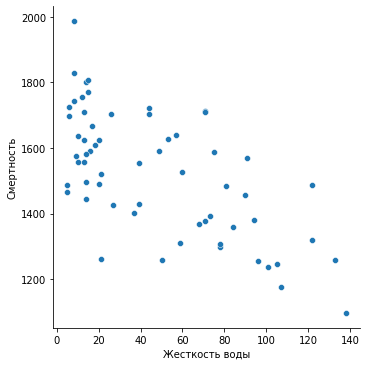

In [5]:
sns.relplot(data=rezult_anl, x="Жесткость воды", y="Смертность")

Вывод: Из точечного графика видно, что жесткость воды имеет  низкую связь со смертностью. 

# 2. Коэффициент корреляции Пирсона и Спирмена

In [6]:
rezult_anl.corr()# Коэффициент корреляции Пирсона

,Смертность,Жесткость воды
Смертность,1.000000,-0.654849
Жесткость воды,-0.654849,1.000000


Вывод: высокая отрицательная связь

In [7]:
rezult_anl.corr(method='spearman')# Коэффициент корреляции Спирмена

,Смертность,Жесткость воды
Смертность,1.000000,-0.631665
Жесткость воды,-0.631665,1.000000


Вывод: умеренная отрицательная связь

# 3.Модель линейной регрессии

In [8]:
x = rezult_ru[['Жесткость воды']]
y = rezult_ru['Смертность']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
model = LinearRegression()
model.fit(x, y)
print('Двумерный массив с единственным элементом b₁:', model.coef_)

Двумерный массив с единственным элементом b₁: [-3.22609161]


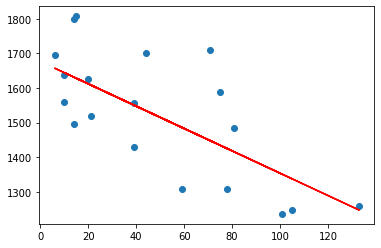

In [13]:
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

# 4.Коэффициент детерминации

In [14]:
r_sq = model.score(x, y)
print('Коэффициент детерминации:', r_sq)

Коэффициент детерминации: 0.4288267193124974


Вывод: Коэффициент детерминации показывает, что  модель  имеет умеренная силу связи.

## 5. График остатков

In [18]:
x_const = sm.add_constant(x_train)

In [19]:
model = sm.OLS(y_train, x_const)
results_os = model.fit()

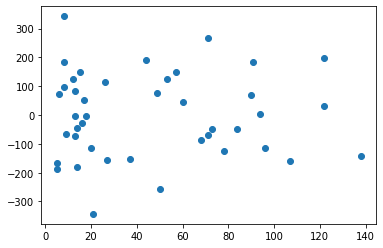

In [20]:
plt.scatter(x_const.iloc[:, 1], results_os.resid)

Вывод:  остатки сруппированы в районе низкой жесткости.

# **2.Раздел для района South**

# 1.Точечный график

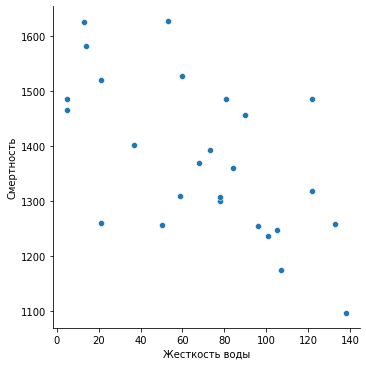

In [21]:
sns.relplot(data=rezult_ru_s, x="Жесткость воды", y="Смертность")

Вывод: Из точечного графика видно, что жесткость воды практический не имеет  связи со смертностью. 

# 2. Коэффициент корреляции Пирсона и Спирмена

In [22]:
rezult_ru_s.corr()# Коэффициент корреляции Пирсона

,Номер,Смертность,Жесткость воды
Номер,1.000000,0.396333,-0.005337
Смертность,0.396333,1.000000,-0.602153
Жесткость воды,-0.005337,-0.602153,1.000000


Вывод: высокая отрицательная связь

In [23]:
rezult_ru_s.corr(method='spearman')# Коэффициент корреляции Спирмена

,Номер,Смертность,Жесткость воды
Номер,1.000000,0.354591,-0.013685
Смертность,0.354591,1.000000,-0.595723
Жесткость воды,-0.013685,-0.595723,1.000000


Вывод: умеренная отрицательная связь

# 3.Модель линейной регрессии

In [24]:
x_s = rezult_ru_s[['Жесткость воды']]
y_s = rezult_ru_s['Смертность']

In [26]:
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(x_s, y_s)
print('Двумерный массив с единственным элементом b₁:', model.coef_)


Двумерный массив с единственным элементом b₁: [-2.09271845]


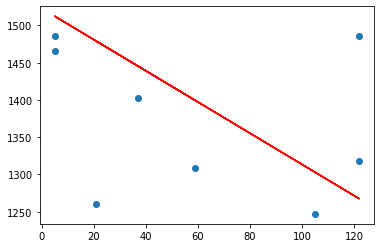

In [27]:
y_pred_s = model.predict(x_s_test)
plt.scatter(x_s_test, y_s_test)
plt.plot(x_s_test, y_pred_s, c='r')

# 4.Коэффициент детерминации

In [28]:
r_sq_s = model.score(x_s, y_s)
print('Коэффициент детерминации:', r_sq_s)

Коэффициент детерминации: 0.3625885624364601


Вывод: Коэффициент детерминации показывает, что  модель  имеет слабую силу связи.

## 5. График остатков

In [29]:
x_s_const = sm.add_constant(x_s_train)

In [30]:
model = sm.OLS(y_s_train, x_s_const)
results_n = model.fit()

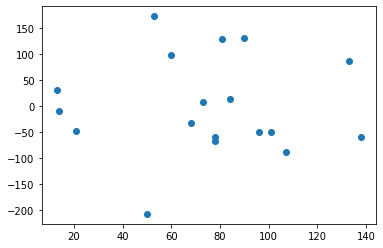

In [31]:
plt.scatter(x_s_const.iloc[:, 1], results_n.resid)

Вывод: остатки по Южному району не имеют яркой выраженой сруппированности, а  распределены по всему району.

# **2.Раздел для района North**

# 1.Точечный график

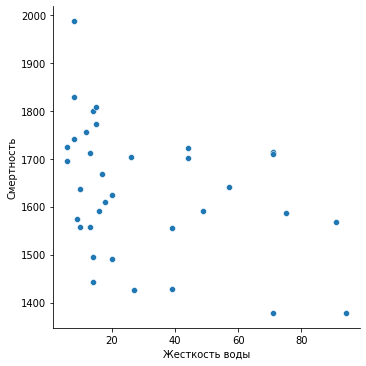

In [32]:
sns.relplot(data=rezult_ru_n, x="Жесткость воды", y="Смертность")

Вывод: Из точечного графика видно, что жесткость воды имеет низкую связь со смертностью. 

# 2. Коэффициент корреляции Пирсона и Спирмена

In [33]:
rezult_ru_n.corr()# Коэффициент корреляции Пирсона

,Номер,Смертность,Жесткость воды
Номер,1.000000,-0.103548,0.309195
Смертность,-0.103548,1.000000,-0.368598
Жесткость воды,0.309195,-0.368598,1.000000


Вывод: высокая отрицательная связь

In [34]:
rezult_ru_n.corr(method='spearman')# Коэффициент корреляции Спирмена

,Номер,Смертность,Жесткость воды
Номер,1.000000,-0.109812,0.222145
Смертность,-0.109812,1.000000,-0.404208
Жесткость воды,0.222145,-0.404208,1.000000


Вывод: умеренная отрицательная связь

# 3.Модель линейной регрессии

In [35]:
x_n = rezult_ru_n[['Жесткость воды']]
y_n = rezult_ru_n['Смертность']

In [36]:
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(x_n, y_n, test_size=0.30, random_state=42)

In [38]:
model = LinearRegression()
model.fit(x_n, y_n)
print('Двумерный массив с единственным элементом b₁:', model.coef_)

Двумерный массив с единственным элементом b₁: [-1.93134215]


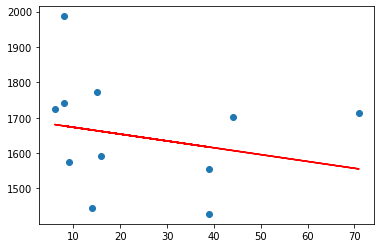

In [39]:
y_pred_n = model.predict(x_n_test)
plt.scatter(x_n_test, y_n_test)
plt.plot(x_n_test, y_pred_n, c='r')

# 4.Коэффициент детерминации

In [40]:
r_sq_n = model.score(x_n, y_n)
print('Коэффициент детерминации:', r_sq_n)

Коэффициент детерминации: 0.1358643664207173


Вывод: Коэффициент детерминации показывает, что  модель  имеет слабую силу связи.

## 5. График остатков

In [49]:
x_n_const = sm.add_constant(x_n_train)

In [50]:
model = sm.OLS(y_n_train, x_n_const)
results_n = model.fit()

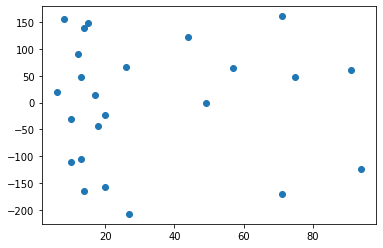

In [52]:
plt.scatter(x_n_const.iloc[:, 1], results_n.resid)

Вывод:  остатки  Северному району сруппированы в районе низкой жесткости.

# Сравнение двух районов 

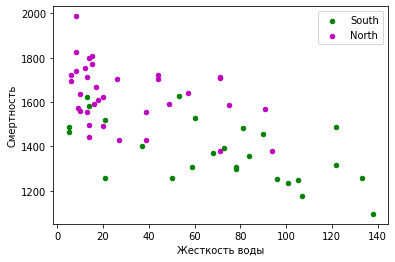

In [48]:
ax = rezult_ru_s.plot(kind='scatter', x ='Жесткость воды', y = 'Смертность', c ='g')
rezult_ru_n.plot(ax=ax, kind='scatter', x ='Жесткость воды', y = 'Смертность', c ='m')
ax.legend(['South', 'North'])

Вывод:  По двум района Северному и Южному сруппированы в районе низкой жесткости и имеют ярко выраженныю сгруппированности, можно сказать, что смертности и жесткость воды, может быть, но нужнен  более грубокий анализ, других показателей, что бы точно доказать, наличее связи.